# Customer Churn 

# Setup & data loading 

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [52]:
# Load data
csv_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
if not os.path.exists(csv_path):
	raise FileNotFoundError(f"File not found: {csv_path}. Make sure the CSV file is in the notebook working directory: {os.getcwd()}")
df = pd.read_csv(csv_path)

In [74]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
df.shape

(7032, 20)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


# Data quality checks

In [78]:
misisng_values = df.isnull().sum()
print("Missing values in each column:")
print(misisng_values)

Missing values in each column:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [79]:
df.drop_duplicates(inplace=True)


In [80]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# data cleaning 

In [81]:
# fix 'totalcharges' column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
missing_total_charges = df['TotalCharges'].isnull().sum()
print(f"Missing values in 'TotalCharges' after conversion: {missing_total_charges}")

Missing values in 'TotalCharges' after conversion: 0


In [82]:
# Drop rows with missing 'TotalCharges' values
df.dropna(subset=['TotalCharges'], inplace=True)

In [84]:
drop_cols = ['customerID']
# drop only if column exists to avoid KeyError
df.drop(columns=drop_cols, inplace=True, errors='ignore')

In [85]:
# separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Identifying the Churn Drivers

## Which customers are likely to churn?

/var/folders/00/c54qzf757tzdyqs5hr4n94vc0000gn/T/ipykernel_30516/757897186.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


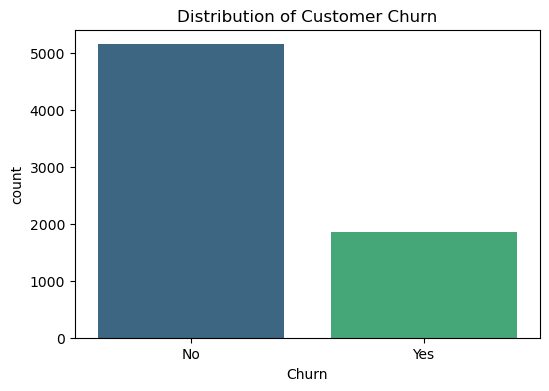

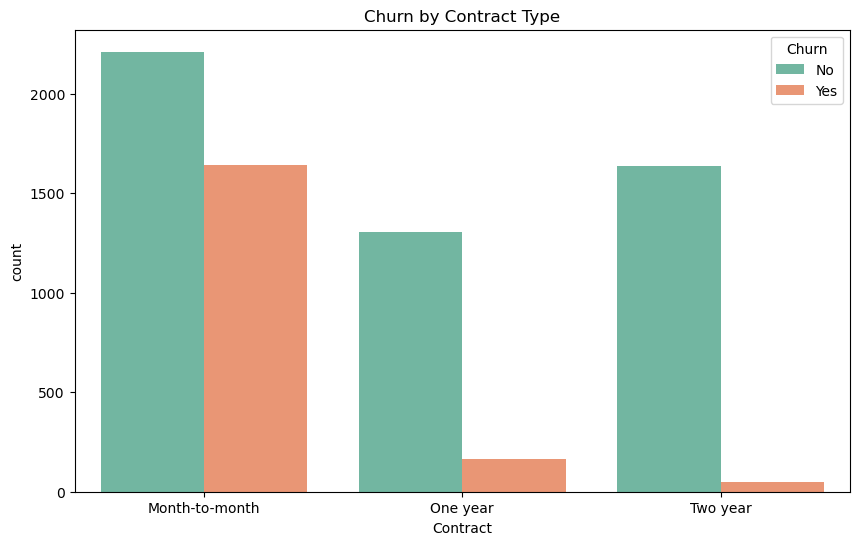

In [86]:
# 1. Visualize Churn Distribution (Class Imbalance)
plt.figure(figsize=(6, 4))
# ensure palette is provided as a string name supported by seaborn/matplotlib
# using 'viridis' to avoid any undefined-name issues
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribution of Customer Churn')
plt.show()

# 2. The "Smoking Gun": Contract Type vs Churn
plt.figure(figsize=(10, 6))
# use hue='Churn' to color by churn
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Churn by Contract Type')
plt.show()


# Monthly Charges vs Churn

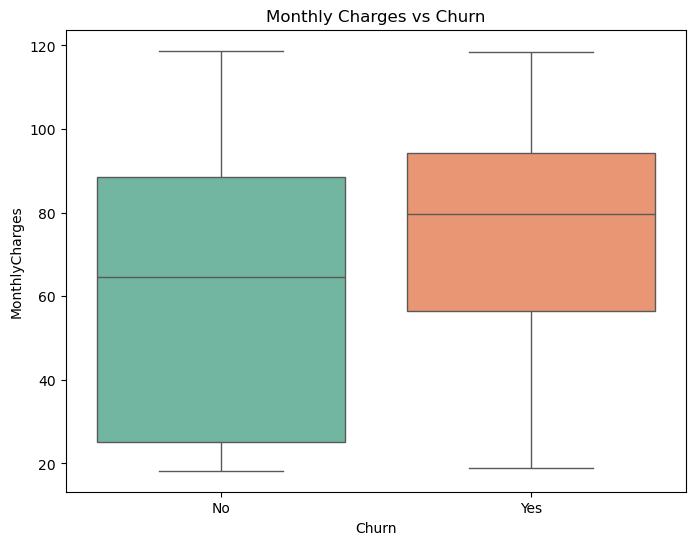

In [87]:
plt.figure(figsize=(8, 6))

# Adding hue='Churn' and legend=False tells Seaborn to color the boxes 
# and prevents an unnecessary legend from appearing on the side.
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, hue='Churn', palette='Set2', legend=False)

plt.title('Monthly Charges vs Churn')
plt.show()


# Analyzing Numerical Relationships 
### Does paying more make you leave ?Do new customers leave faster ?

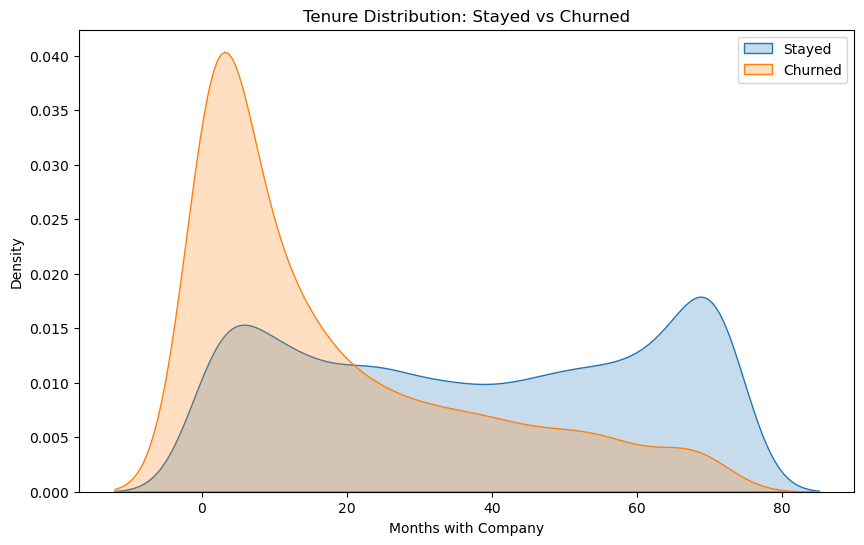

In [88]:
# Tenure vs Churn
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Churn'] == 'No']['tenure'], label='Stayed', fill=True)
sns.kdeplot(df[df['Churn'] == 'Yes']['tenure'], label='Churned', fill=True)
plt.title('Tenure Distribution: Stayed vs Churned')
plt.xlabel('Months with Company')
plt.legend()
plt.show()


# Correlation Heat Map

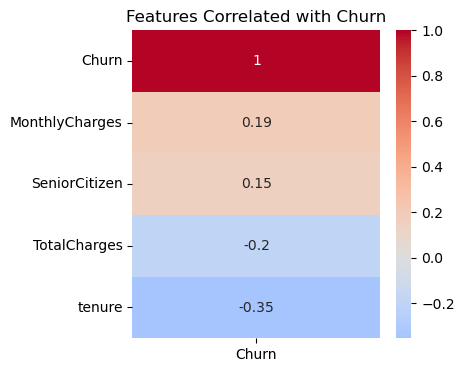

In [89]:
# Quick conversion for correlation check
df_temp = df.copy()

# Convert TotalCharges to numeric (there are string values), coerce errors to NaN
df_temp['TotalCharges'] = pd.to_numeric(df_temp['TotalCharges'], errors='coerce')

# Map target to numeric
df_temp['Churn'] = df_temp['Churn'].map({'Yes': 1, 'No': 0})

# Select numeric columns only to avoid non-numeric fields like customerID
num_cols = df_temp.select_dtypes(include=['number']).columns.tolist()
# Ensure 'Churn' is present
if 'Churn' not in num_cols:
    num_cols.append('Churn')

# Correlation with the target
churn_corr = df_temp[num_cols].corr()[['Churn']].sort_values(by='Churn', ascending=False)

plt.figure(figsize=(4, max(4, len(churn_corr) * 0.4)))
sns.heatmap(churn_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Features Correlated with Churn')
plt.show()


# Overall Churn rate 

In [90]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.735093
Yes    0.264907
Name: proportion, dtype: float64

# Churn Rate by Contract type

In [91]:
contract_churn = (
    df.groupby('Contract')['Churn']
      .value_counts(normalize=True)
      .unstack()
      * 100
)

contract_churn.round(2)

Churn,No,Yes
Contract,,
Month-to-month,57.36,42.64
One year,88.72,11.28
Two year,97.15,2.85


# Median Charges vs Tenure 

In [92]:
df['Churn'].value_counts(normalize=True)

df.groupby('Contract')['Churn'].value_counts(normalize=True)

df.groupby('Churn')[['MonthlyCharges','tenure']].median()

,MonthlyCharges,tenure
Churn,,
No,64.55,38.0
Yes,79.70,10.0


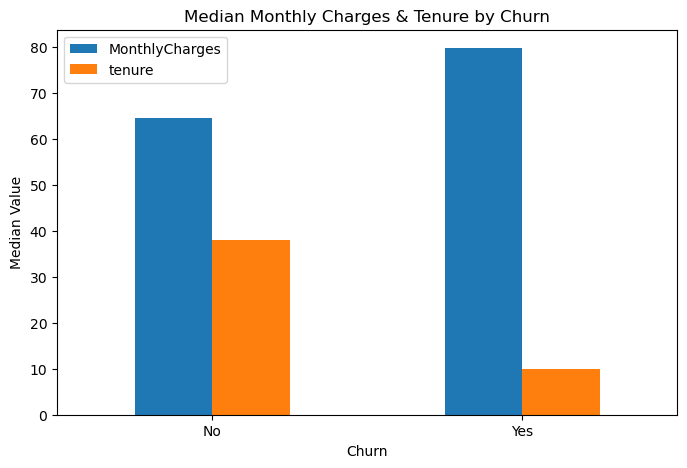

In [93]:
summary = df.groupby('Churn')[['MonthlyCharges','tenure']].median()

summary.plot(kind='bar', figsize=(8,5))
plt.title('Median Monthly Charges & Tenure by Churn')
plt.ylabel('Median Value')
plt.xticks(rotation=0)
plt.show()

# Univariate Analysis: Categorical features 

/var/folders/00/c54qzf757tzdyqs5hr4n94vc0000gn/T/ipykernel_30516/3906189233.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='viridis', order=order_list)
/var/folders/00/c54qzf757tzdyqs5hr4n94vc0000gn/T/ipykernel_30516/3906189233.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='viridis', order=order_list)
/var/folders/00/c54qzf757tzdyqs5hr4n94vc0000gn/T/ipykernel_30516/3906189233.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[

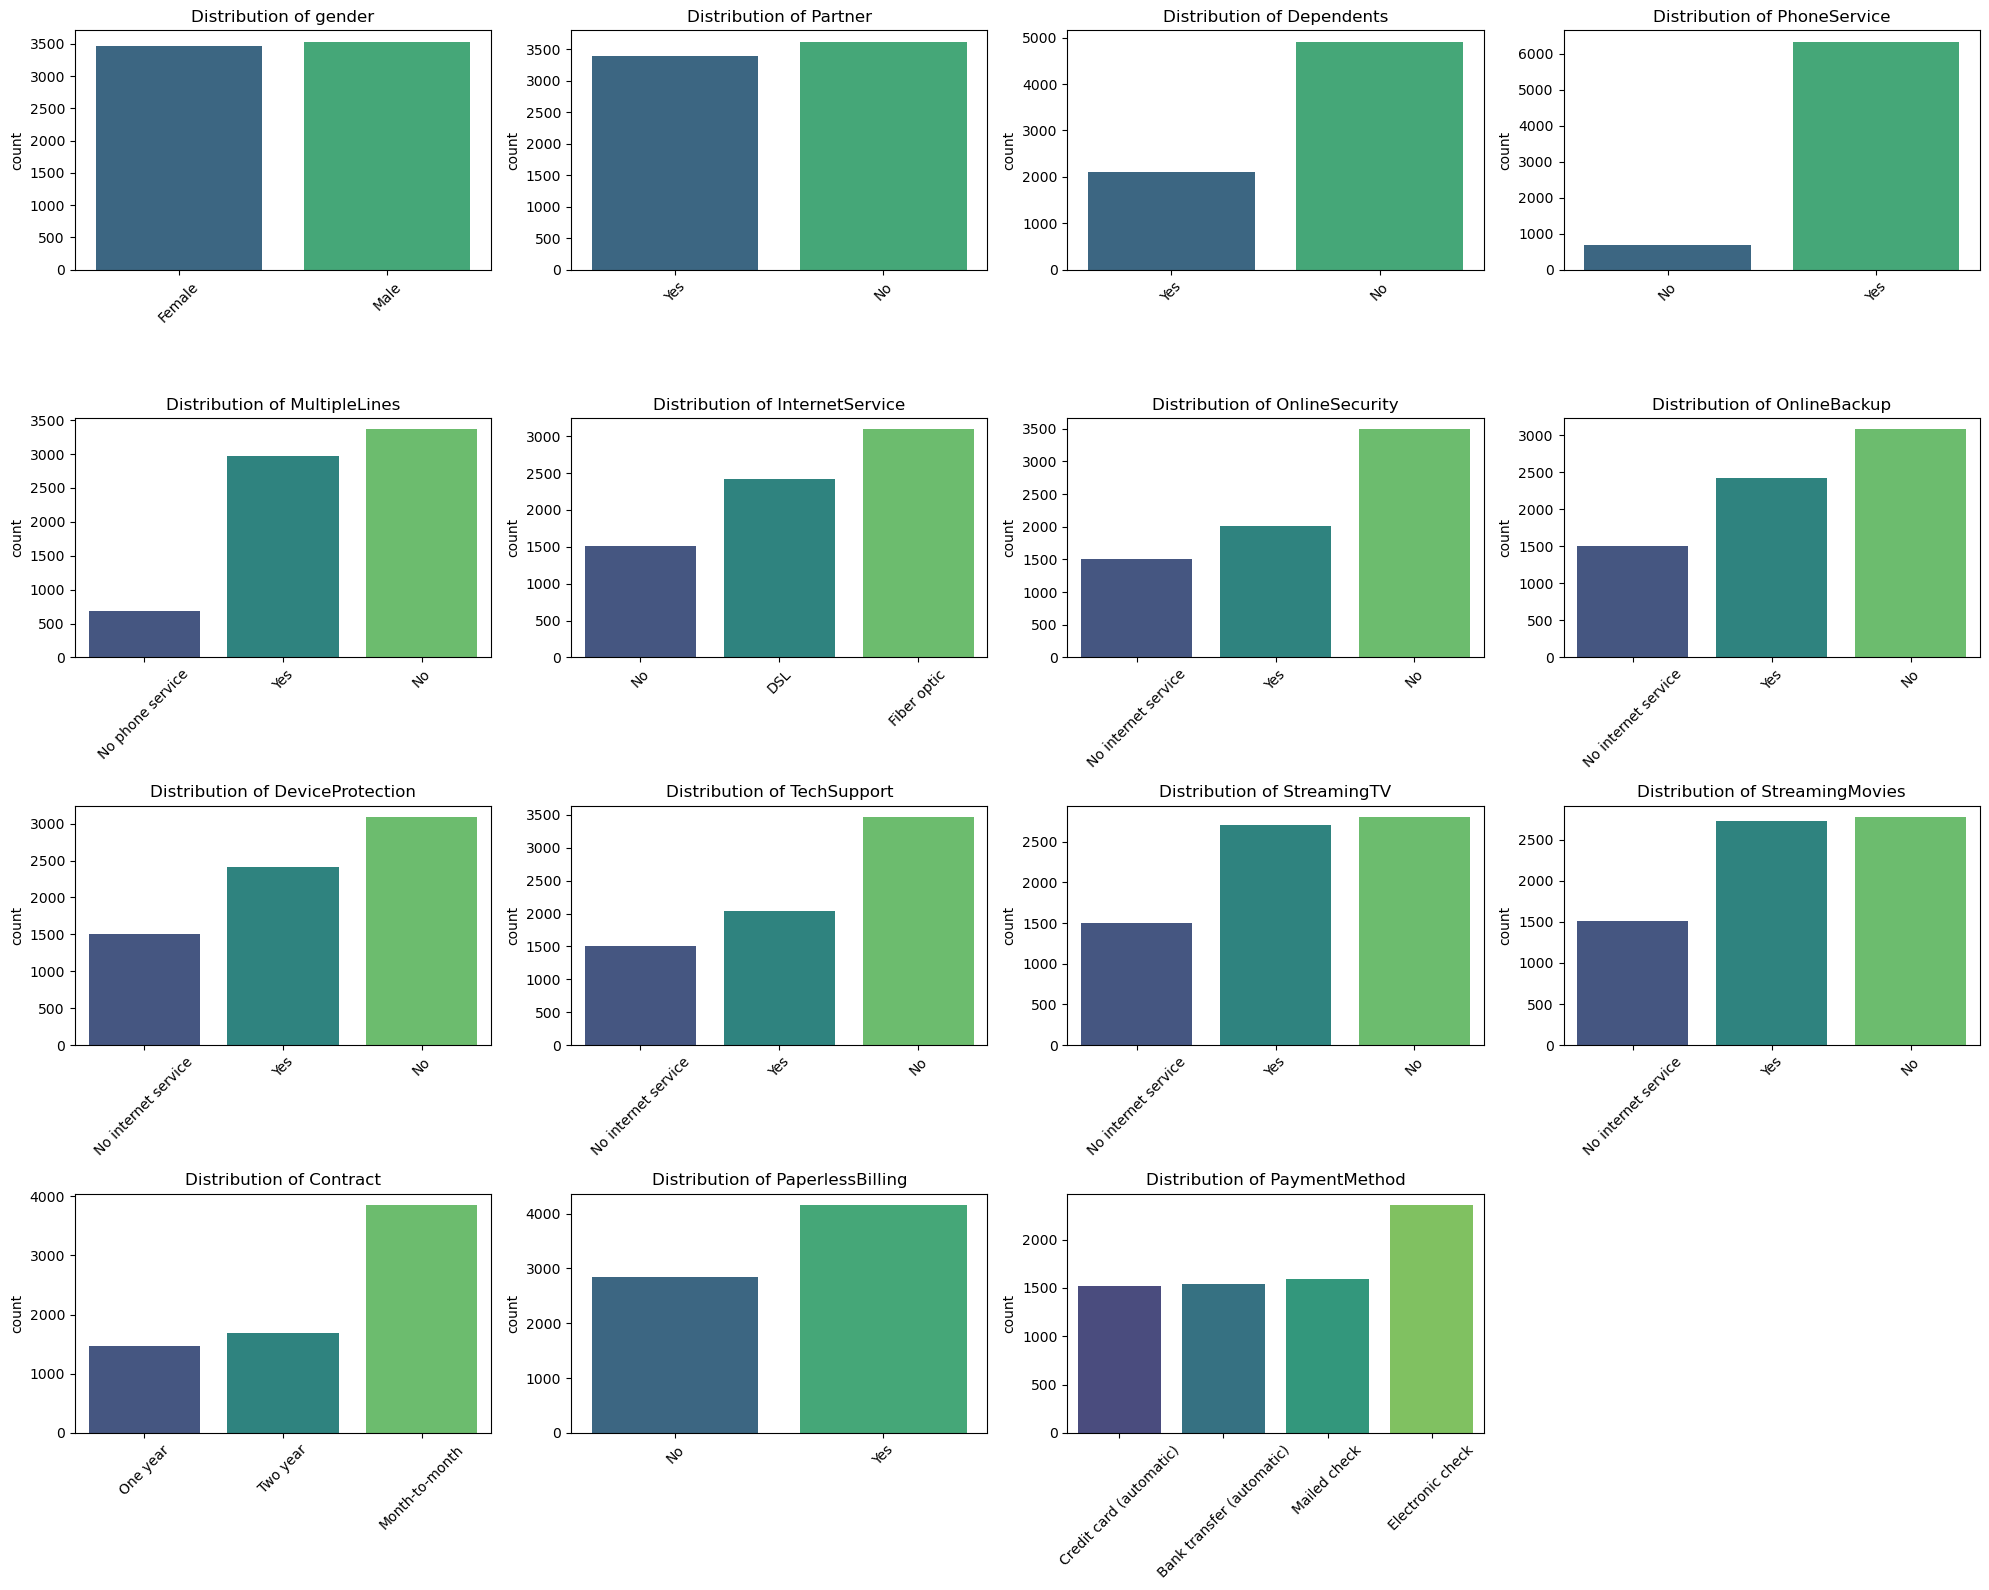

In [102]:
# Identify all categorical columns except the target
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'Churn' in cat_cols: cat_cols.remove('Churn')

# Calculate number of rows needed for the grid (4 columns wide)
n_rows = (len(cat_cols) + 3) // 4 

fig, axes = plt.subplots(n_rows, 4, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    # This line sorts the categories by count in ascending order
    # Change [::-1] to [:] if you want descending instead
    order_list = df[col].value_counts(ascending=True).index
    
    sns.countplot(x=col, data=df, ax=axes[i], palette='viridis', order=order_list)
    
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Univariate Analysis:Numerical features

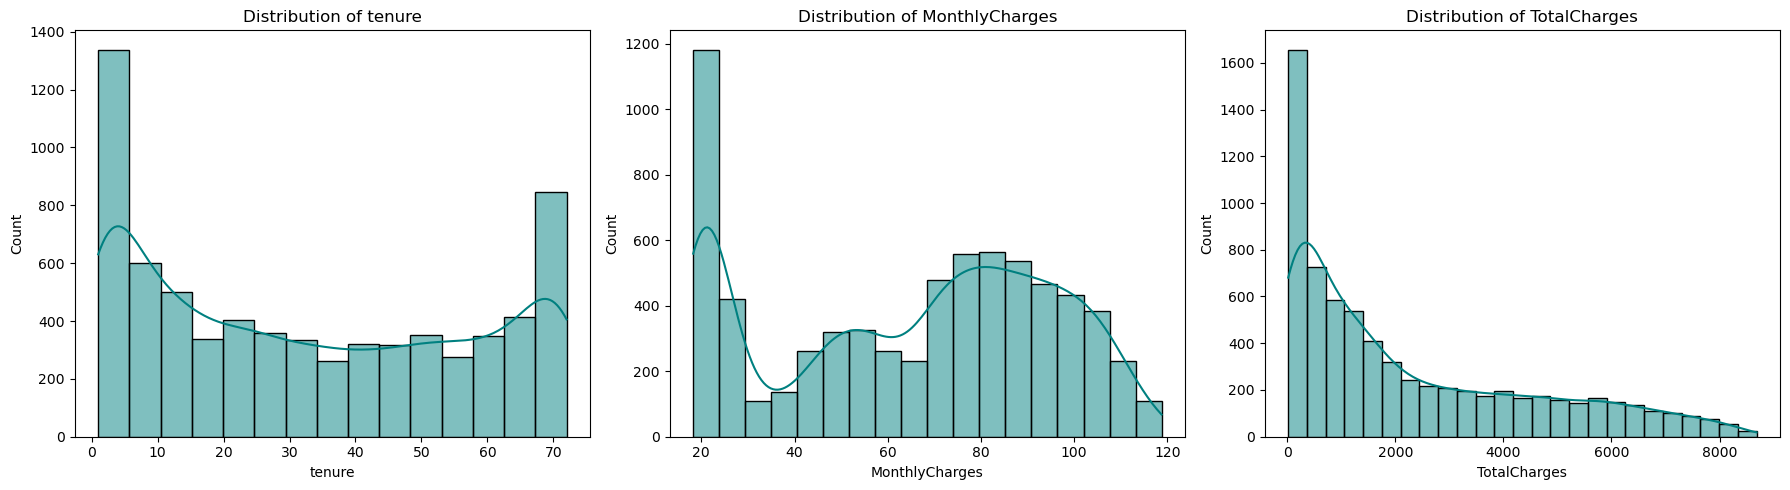

In [96]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(18, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


# Correlation heatmap of numerical features

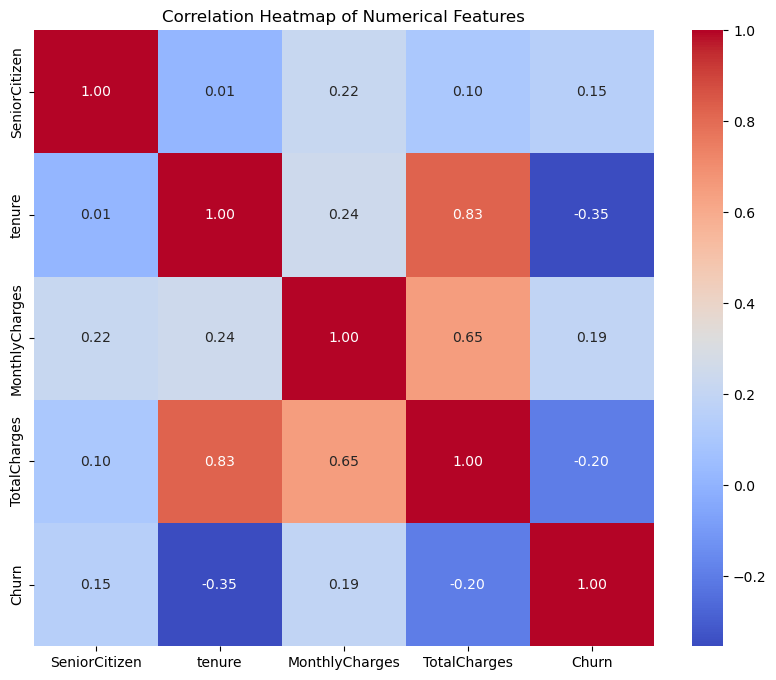

In [97]:
# Create the heatmap for numerical features
plt.figure(figsize=(10, 8))
# We only use numerical columns and the mapped 'Churn'
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [99]:
# Calculate variables for summary
churn_rate = (df['Churn'] == 'Yes').sum() / len(df) * 100
tenure_churned = df[df['Churn'] == 'Yes']['tenure'].median()
tenure_stayed = df[df['Churn'] == 'No']['tenure'].median()
charges_churned = df[df['Churn'] == 'Yes']['MonthlyCharges'].mean()
charges_stayed = df[df['Churn'] == 'No']['MonthlyCharges'].mean()
diff = charges_churned - charges_stayed

# === SUMMARY OF KEY INSIGHTS ===
print("\n" + "="*80)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
# ... rest of your code



KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS


In [103]:
# === Calculate metrics for summary ===
churn_rate = (df['Churn'] == 'Yes').sum() / len(df) * 100
tenure_churned = df[df['Churn'] == 'Yes']['tenure'].median()
tenure_stayed = df[df['Churn'] == 'No']['tenure'].median()
charges_churned = df[df['Churn'] == 'Yes']['MonthlyCharges'].mean()
charges_stayed = df[df['Churn'] == 'No']['MonthlyCharges'].mean()
diff = charges_churned - charges_stayed

# === SUMMARY OF KEY INSIGHTS ===

print("\n" + "="*80)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("="*80)

print(f"\n1️ OVERALL CHURN:")
print(f"   • Total Customers: {len(df):,}")
print(f"   • Churn Rate: {churn_rate:.2f}%")
print(f"   • Class imbalance present → Focus on RECALL metric")

print(f"\n2️ CONTRACT TYPE (Strongest Predictor):")
print(f"   • Month-to-month: {contract_churn.loc['Month-to-month', 'Yes']:.1f}% churn")
print(f"   • One year: {contract_churn.loc['One year', 'Yes']:.1f}% churn")
print(f"   • Two year: {contract_churn.loc['Two year', 'Yes']:.1f}% churn")
print(f"   • {contract_churn.loc['Month-to-month', 'Yes'] / contract_churn.loc['Two year', 'Yes']:.1f}X higher risk for month-to-month!")

print(f"\n3️ TENURE (Customer Loyalty):")
print(f"   • Churned: {tenure_churned:.0f} months median")
print(f"   • Retained: {tenure_stayed:.0f} months median")
print(f"   • First 12 months are critical!")

print(f"\n4️ MONTHLY CHARGES (Price Sensitivity):")
print(f"   • Churned: ${charges_churned:.2f} average")
print(f"   • Retained: ${charges_stayed:.2f} average")
print(f"   • Difference: ${diff:.2f} higher for churned ({(diff/charges_stayed)*100:.1f}%)")
print(f"   • Higher prices correlate with higher churn")

print(f"\n5️ CORRELATION ANALYSIS:")
print(f"   • tenure: strongest negative correlation (r = {churn_corr.loc['tenure', 'Churn']:.3f})")
print(f"   • MonthlyCharges: positive correlation with churn (r = {churn_corr.loc['MonthlyCharges', 'Churn']:.3f})")

print("\n" + "="*80)
print("BUSINESS RECOMMENDATIONS")
print("="*80)
print("1. Incentivize long-term contracts (target month-to-month customers)")
print("2. Focus retention on first 12 months (onboarding programs)")
print("3. Review pricing for high-paying customers (loyalty discounts)")
print("4. Build ML model to identify at-risk customers early")
print("="*80)



KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1️ OVERALL CHURN:
   • Total Customers: 7,010
   • Churn Rate: 26.49%
   • Class imbalance present → Focus on RECALL metric

2️ CONTRACT TYPE (Strongest Predictor):
   • Month-to-month: 42.6% churn
   • One year: 11.3% churn
   • Two year: 2.8% churn
   • 15.0X higher risk for month-to-month!

3️ TENURE (Customer Loyalty):
   • Churned: 10 months median
   • Retained: 38 months median
   • First 12 months are critical!

4️ MONTHLY CHARGES (Price Sensitivity):
   • Churned: $74.60 average
   • Retained: $61.39 average
   • Difference: $13.22 higher for churned (21.5%)
   • Higher prices correlate with higher churn

5️ CORRELATION ANALYSIS:
   • tenure: strongest negative correlation (r = -0.353)
   • MonthlyCharges: positive correlation with churn (r = 0.194)

BUSINESS RECOMMENDATIONS
1. Incentivize long-term contracts (target month-to-month customers)
2. Focus retention on first 12 months (onboarding programs)
3. Review pricing for high-pay